In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('top_hts_comms.csv')
df['comments'] = df['comments'].fillna(0.1)
df.head()

,sub,tot,comments
0,/r/nocontext,74144,93710.0
1,/r/thathappened,72148,1552619.0
2,/r/titlegore,52831,47138.0
3,/r/iamverysmart,47967,1375856.0
4,/r/hailcorporate,38013,183451.0


In [3]:
df['x'] = np.log(df['tot']) + np.log(df['comments'])
df['ratio'] = np.log(df['tot']) - np.log(df['comments'])
df.head()

,sub,tot,comments,x,ratio
0,/r/nocontext,74144,93710.0,22.661725,-0.234196
1,/r/thathappened,72148,1552619.0,25.441929,-3.068979
2,/r/titlegore,52831,47138.0,21.635688,0.114019
3,/r/iamverysmart,47967,1375856.0,24.912855,-3.356318
4,/r/hailcorporate,38013,183451.0,22.665386,-1.574019


Adjusting!
getting worse than history
breaking on iteration 17


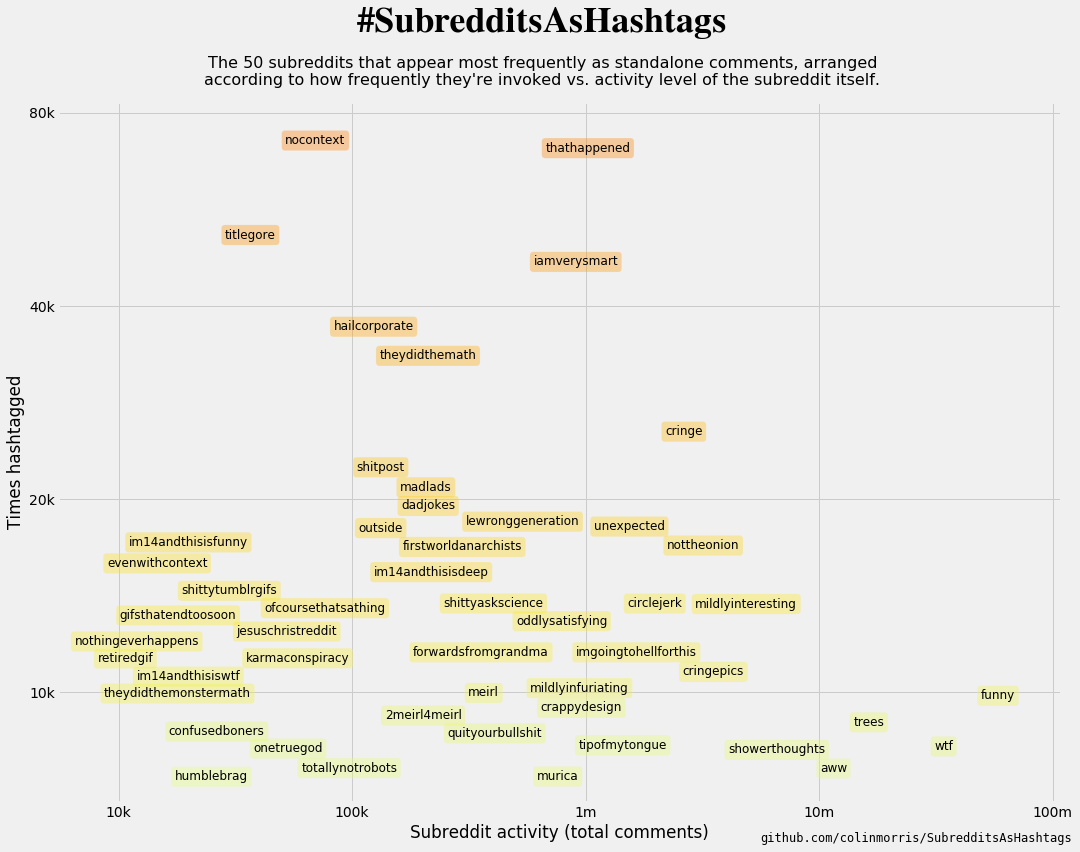

In [68]:
import adjustText
reload(adjustText)
adjust_text = adjustText.adjust_text

from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl

FS = (16, 12)

@FuncFormatter
def k_formatter(x, _pos):
    x = int(x)
    m = 10**6
    if x >= m:
        if x % m == 0:
            return '{:d}m'.format(x//m)
        else:
            return '{:.1f}m'.format(x/m)
    elif x < 1000:
        return str(x)
    return '{:d}k'.format(int(x)//1000)


def scatter(d, logx=True, logy=True, T=False, fs=FS, debug_at=False, cmap='Wistia', bg_alpha=0.3):
    n = len(d)
    fig, ax = plt.subplots(figsize=fs)
    X, Y = d.tot, d.comments
    if T:
        X, Y = Y, X
    ax.scatter(X, Y, alpha=0.)
    
    norm = mpl.colors.LogNorm(vmin=d['tot'].min(),vmax=d['tot'].max())
    #norm = mpl.colors.Normalize(vmin=d['tot'].min(),vmax=d['tot'].max())
    cm = plt.get_cmap(cmap)
    bbox_props = dict(boxstyle='round', facecolor='wheat', alpha=bg_alpha)
    texts = []
    for i in range(n):
        x, y = X.iloc[i], Y.iloc[i]
        s = d.iloc[i]['sub'][3:]
        bgcolor = cm(norm(d.iloc[i]['tot']))
        bbox_props['facecolor'] = bgcolor
        t = ax.text(x, y, s, bbox=bbox_props,
                    fontsize=12
                   )
        texts.append(t)

    xlab, ylab = 'Times hashtagged', 'Subreddit activity (total comments)'
    if T:
        xlab, ylab = ylab, xlab
    ax.set_xlabel(xlab)
    if logx:
        ax.set_xscale('log')
    ax.xaxis.set_major_formatter(k_formatter)

    ax.set_ylabel(ylab)
    if logy:
        ax.set_yscale('log')
        ax.set_yticks([10000 * i for i in [1, 2, 4, 8]])
    ax.yaxis.set_major_formatter(k_formatter)

    at_kwargs = dict(ax=ax, lim=400,
                #arrowprops=dict(arrowstyle='->', color='b'),
                text_from_points=0,
                expand_text=(1.0,1.3),
                     autoalign='xy',
                     #arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                precision=0.000,)
    if debug_at:
        at_kwargs.update(lim=10, save_steps=True, save_prefix='a_t')
    #adjust_text(texts, **at_kwargs)
    
    #ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    
    fn = 'FreeSerif'
    title_y = .97
    sub_y = .88
    subplot_y = .86
    title = '#SubredditsAsHashtags'
    fig.suptitle(title, y=title_y, fontsize=36, 
                 fontweight='bold', 
                 fontname=fn,
                )
    sub = ('The 50 subreddits that appear most frequently as standalone comments, '
           "arranged according to how frequently they're invoked vs. activity "
          "level of the subreddit itself.")
    bp = sub.find('according to how frequently th')
    sub = sub[:bp-1] + '\n' + sub[bp:]
    fig.text(.5, sub_y, sub, horizontalalignment='center',
             fontsize=16,
             wrap=True,
             #fontname=fn,
            )

    footnote = 'source: Reddit comments dataset'
    footnote = 'github.com/colinmorris/SubredditsAsHashtags'
    fig.text(.96, .004, footnote, fontsize=12, ha='right', family='monospace')
    
    #fig.tight_layout();
    plt.subplots_adjust(top=subplot_y, bottom=.05)
    adjust_text(texts, **at_kwargs)
    
    return ax

n = 50
d = df.iloc[:n]
with plt.style.context('fivethirtyeight'):
    scatter(d, T=1, logx=1, logy=1, fs=(16,12), debug_at=0, cmap='Wistia', bg_alpha=0.35);

In [21]:
print(sorted(plt.style.available))

[u'_classic_test', u'bmh', u'classic', u'dark_background', u'fivethirtyeight', u'ggplot', u'grayscale', u'seaborn', u'seaborn-bright', u'seaborn-colorblind', u'seaborn-dark', u'seaborn-dark-palette', u'seaborn-darkgrid', u'seaborn-deep', u'seaborn-muted', u'seaborn-notebook', u'seaborn-paper', u'seaborn-pastel', u'seaborn-poster', u'seaborn-talk', u'seaborn-ticks', u'seaborn-white', u'seaborn-whitegrid']


seaborn
Adjusting!
getting worse than history
breaking on iteration 14


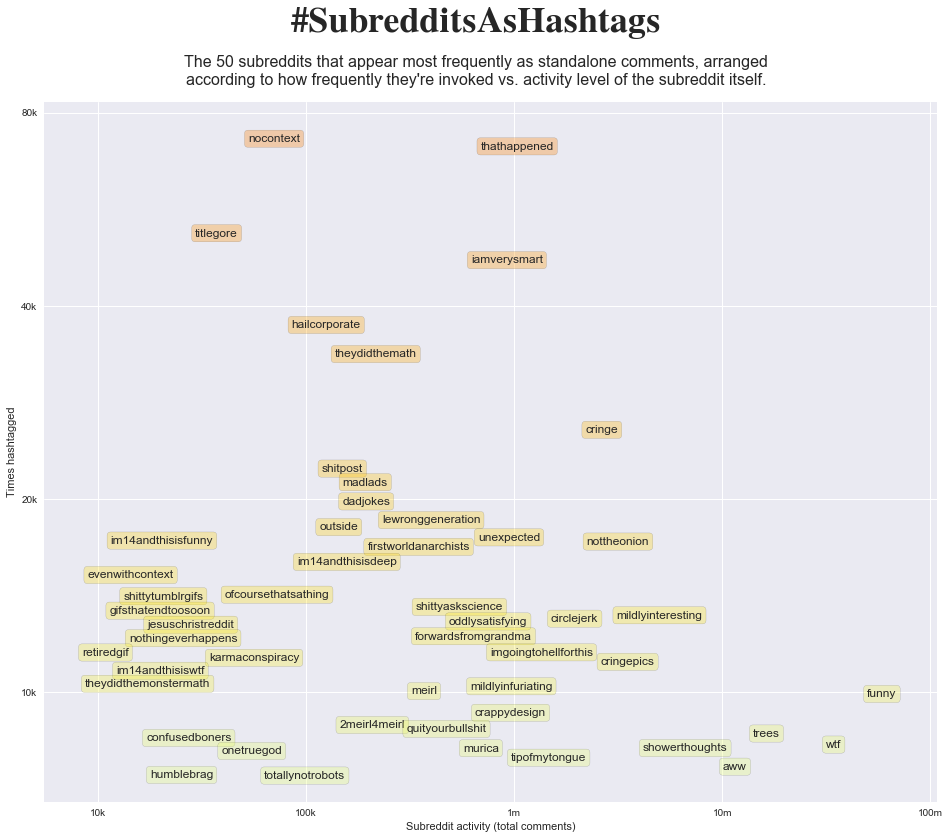

ggplot
Adjusting!
getting worse than history
breaking on iteration 19


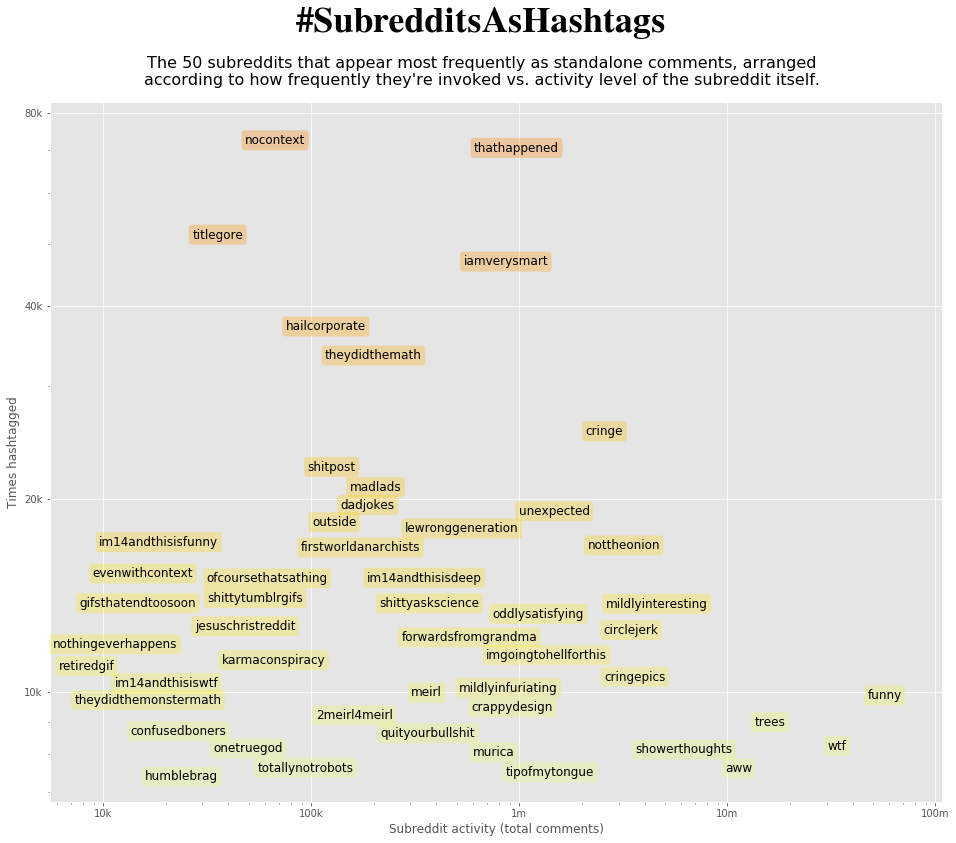

bmh
Adjusting!
getting worse than history
breaking on iteration 19


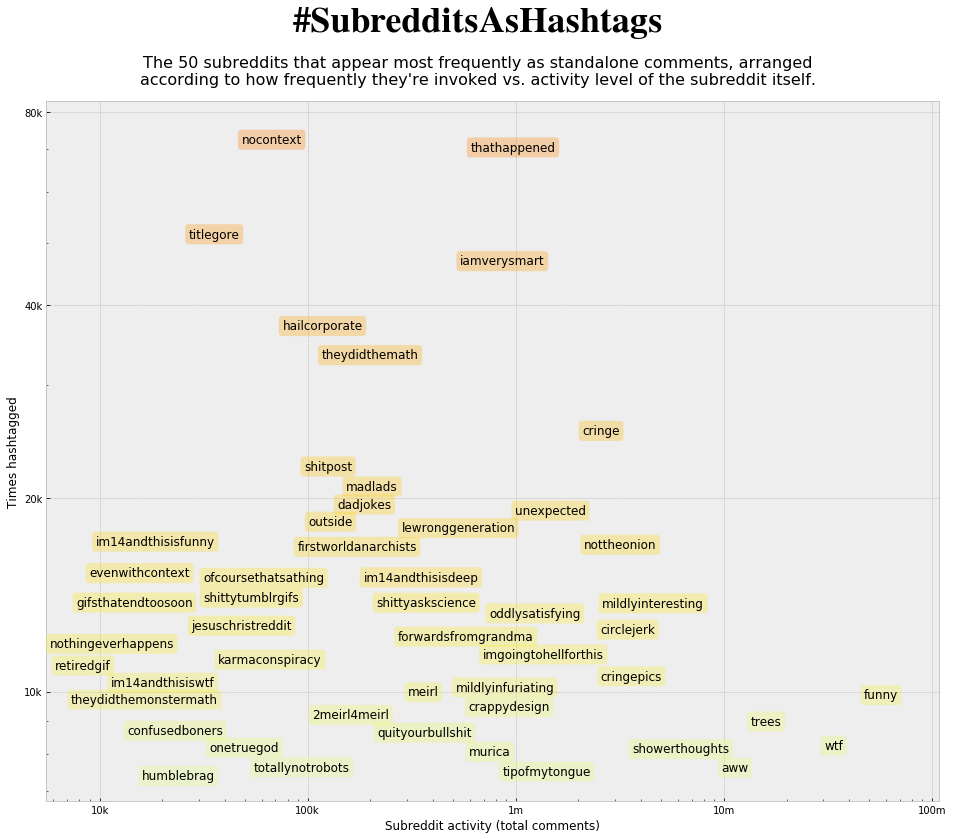

fivethirtyeight
Adjusting!
getting worse than history
breaking on iteration 17


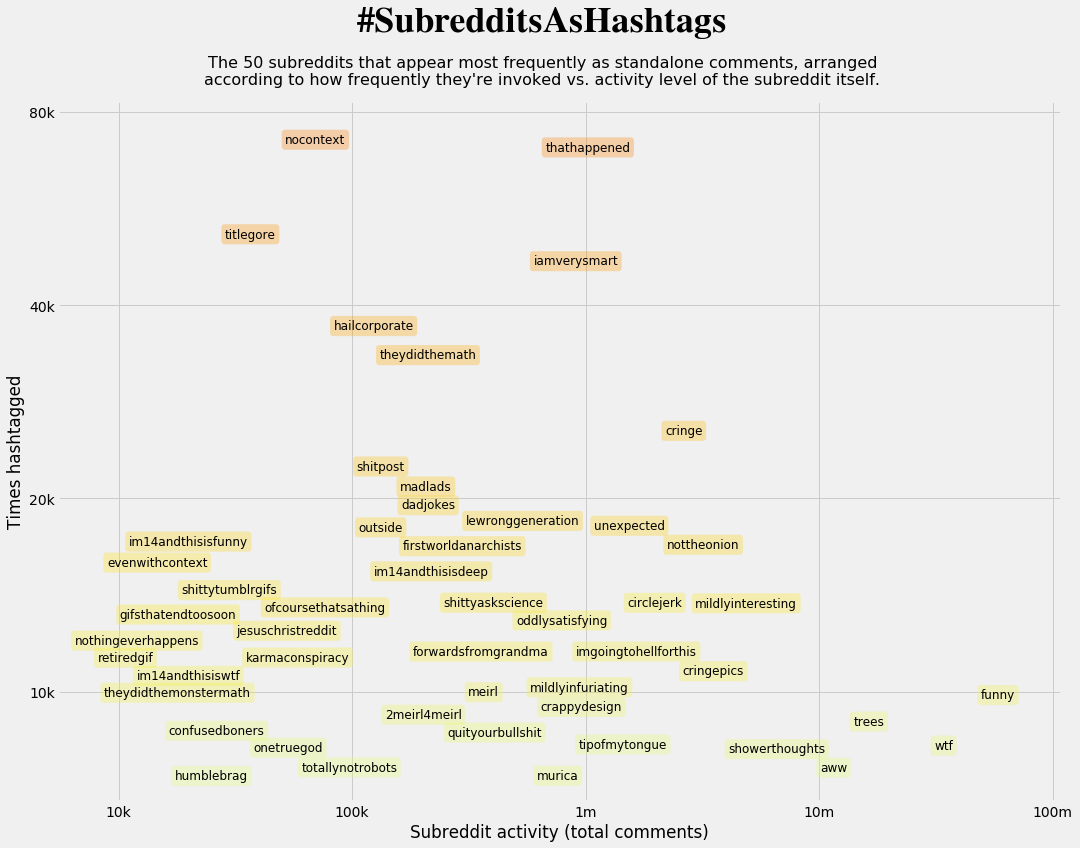

In [28]:
n = 50
d = df.iloc[:n]
styls = ['seaborn', 'ggplot', 'bmh', 'fivethirtyeight']
for styl in styls:
    print styl
    with plt.style.context(styl):
        scatter(d, T=1, logx=1, logy=1)
                #, fs=(16, 5))
        plt.show()

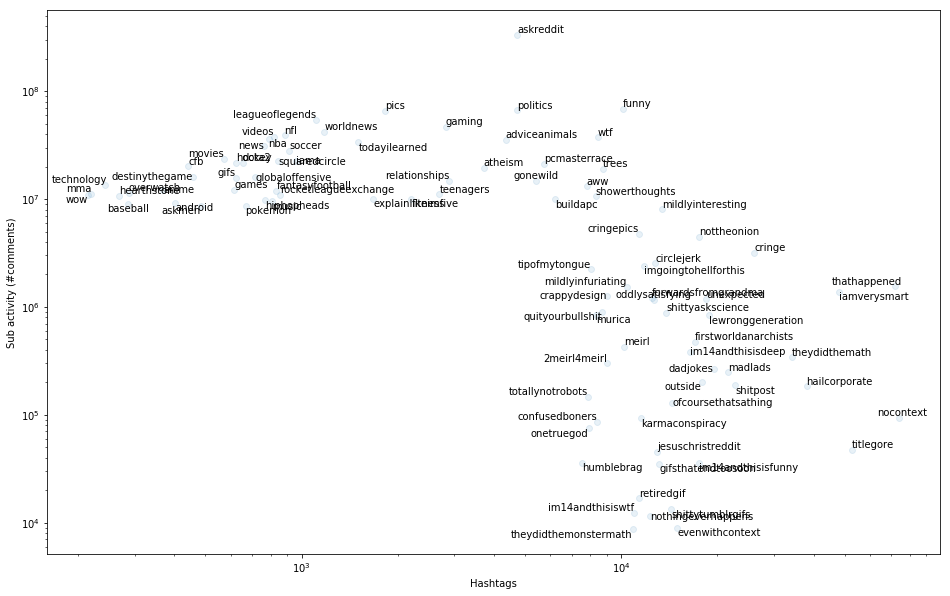

In [5]:
# Top n hashtagged + top n commented
top_hts = 50
top_subs = 50
a = df.head(top_hts)
b = df.sort_values(by='comments', ascending=False).head(top_subs)
d = pd.merge(a, b, 'outer')
scatter(d);

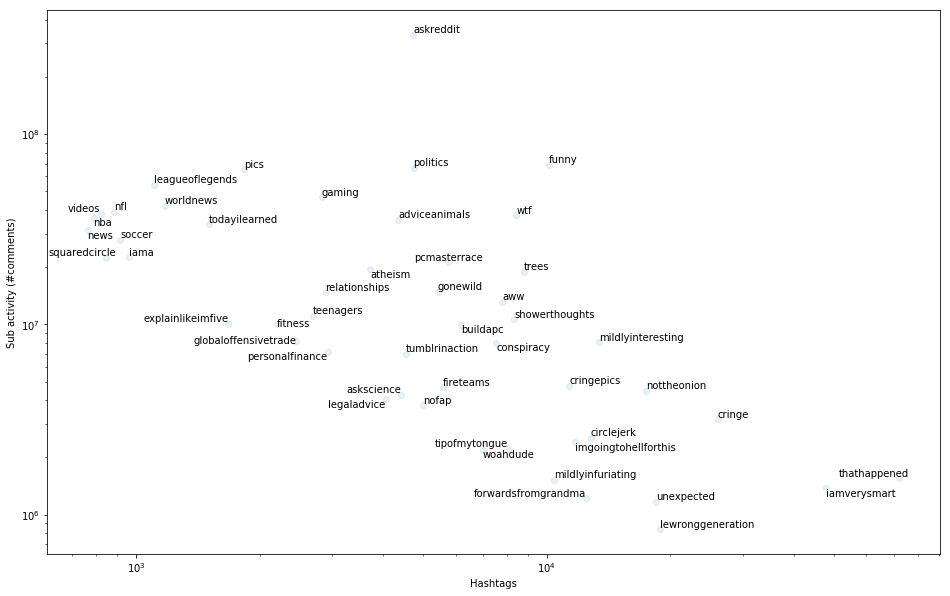

In [6]:
# Sort by combination of hts + sub activity
n = 50
d = df.sort_values(by='x', ascending=False).head(n)
scatter(d);

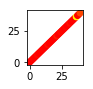

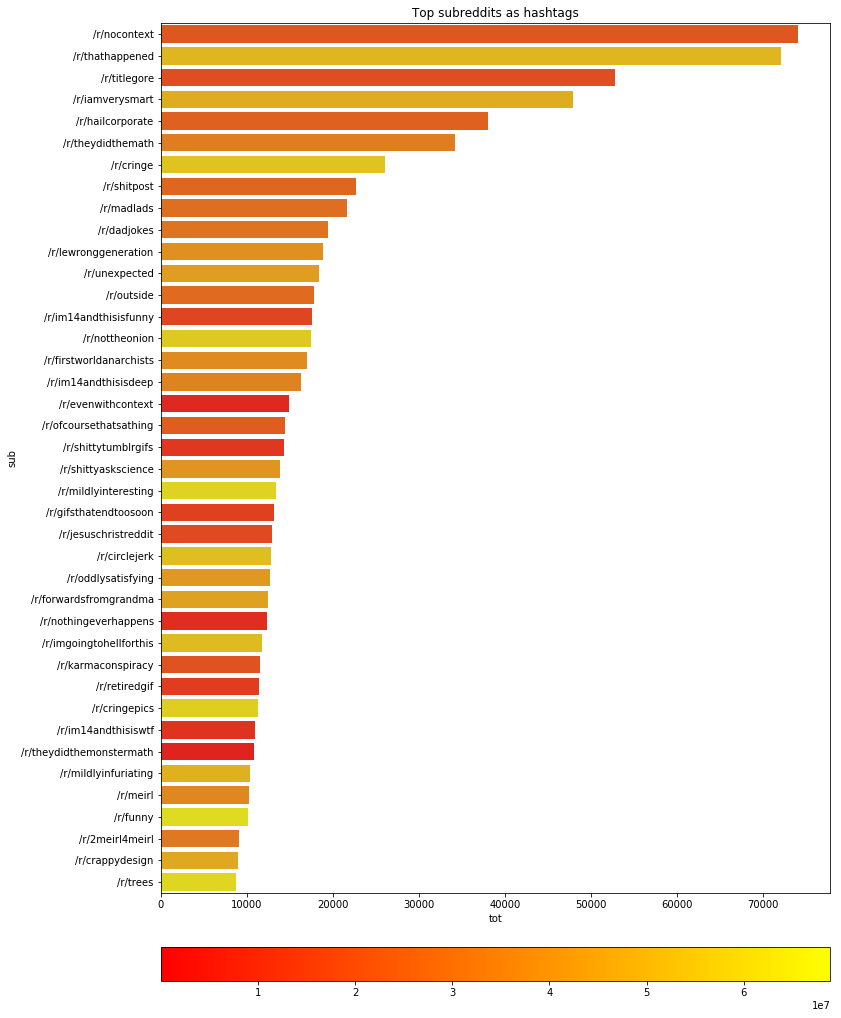

In [7]:
import seaborn as sns

n = 40
d = df.iloc[:n]

FS = (12, n//2)

cmap = 'autumn'

fig0, ax0 = plt.subplots(figsize=(1,1))
# Hack. https://stackoverflow.com/a/49761398/262271
fig, ax = plt.subplots(figsize=FS)
plot = ax0.scatter(d.index, d.index, c=d['comments'], cmap=cmap)
#plt.clf()
plt.colorbar(plot, orientation="horizontal", pad=0.05)


orient = 'h'
x, y = 'sub', 'tot'
if orient == 'h':
    x, y = y, x
sns.barplot(x=x, y=y, data=d, 
            ax=ax,
            hue='comments', dodge=False, 
            #palette=sns.cubehelix_palette(),
            #palette='Blues',
            #palette=sns.dark_palette("muted purple", 15, input="xkcd", reverse=True),
            palette=cmap,
            orient='h',
           )
ax.legend_.remove()
ax.set_title('Top subreddits as hashtags');

In [8]:
d.tot.iloc[1]

72148

In [9]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


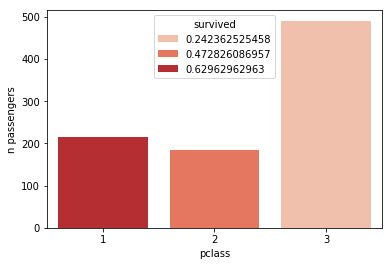

In [10]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
g = titanic.groupby('pclass')
survival_rates = g['survived'].mean()
n = g.size()
ax = sns.barplot(x=n.index, y=n,
           hue=survival_rates, palette='Reds',
            dodge=False,
          )
ax.set_ylabel('n passengers')

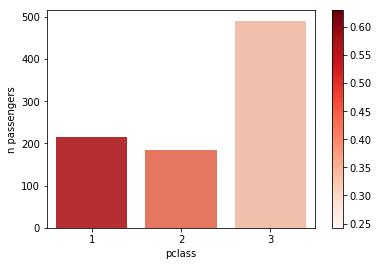

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset("titanic")
g = titanic.groupby('pclass')
survival_rates = g['survived'].mean()
n = g.size()

plot = plt.scatter(n.index, n, c=survival_rates, cmap='Reds')
plt.clf()
plt.colorbar(plot)
ax = sns.barplot(x=n.index, y=n, hue=survival_rates, palette='Reds', dodge=False)
ax.set_ylabel('n passengers')
ax.legend_.remove()

In [61]:
df.sort_values(by='ratio').head(45)

,sub,tot,comments,x,ratio
13143,/r/dbzdokkanbattle,18,2981686.0,17.798371,-12.017628
13503,/r/ffbraveexvius,17,2554522.0,17.586589,-11.920162
10539,/r/summonerswar,24,3096561.0,18.123857,-11.767749
9509,/r/philippines,28,3380148.0,18.365635,-11.701226
9812,/r/bravefrontier,27,2688425.0,18.100303,-11.508629
9987,/r/fireemblemheroes,26,2576191.0,18.019919,-11.503726
13171,/r/ffrecordkeeper,18,1730347.0,17.254204,-11.473461
6753,/r/bigbrother,44,3814251.0,18.938445,-11.370065
4392,/r/guildwars2,75,6218430.0,19.960516,-11.325540
6021,/r/nintendoswitch,51,4114611.0,19.161880,-11.298229


In [13]:
inc = df['comments']==0.1
ncs = df[inc]
print len(ncs)
ncs.sort_values(by='tot', ascending=False).head(5)

616


,sub,tot,comments,x,ratio
150,/r/all,2837,0.1,5.647917,10.253088
254,/r/spaceclop,1785,0.1,5.184589,9.789759
649,/r/lounge,676,0.1,4.213608,8.818778
670,/r/jailbait,652,0.1,4.177459,8.782630
731,/r/nononoyes,595,0.1,4.085976,8.691146


In [14]:
inc = df['comments']<10
df[~inc & (df['tot'] > 500)].sort_values(by='ratio', ascending=False).head(15)

,sub,tot,comments,x,ratio
530,/r/subreddithashtags,845,21.0,9.783859,3.694814
85,/r/subredditsashashtags,4771,209.0,13.812645,3.127977
569,/r/iam14andthisiswtf,787,38.0,10.305814,3.030642
768,/r/im12andthisisfunny,574,34.0,9.878990,2.826269
622,/r/themonstermath,708,43.0,10.323644,2.801244
446,/r/frugaljerk,1019,88.0,11.403914,2.449240
711,/r/outofcontext,614,64.0,10.578878,2.261112
636,/r/underbeard,691,77.0,10.881945,2.194334
857,/r/courtniequinlan,515,58.0,10.304610,2.183724
554,/r/shitcomment,804,97.0,11.264310,2.114888


In [48]:
dt = pd.read_csv('theydidthe.csv')
dt.head()

,sub,tot,comments
0,/r/theydidthemath,34245,340569.0
1,/r/theydidthemonstermath,10869,8667.0
2,/r/theydidthefuckyou,2061,36184.0
3,/r/hedidthemath,1477,282.0
4,/r/theydidthemeth,1012,280.0


In [51]:
FS

(16, 12)

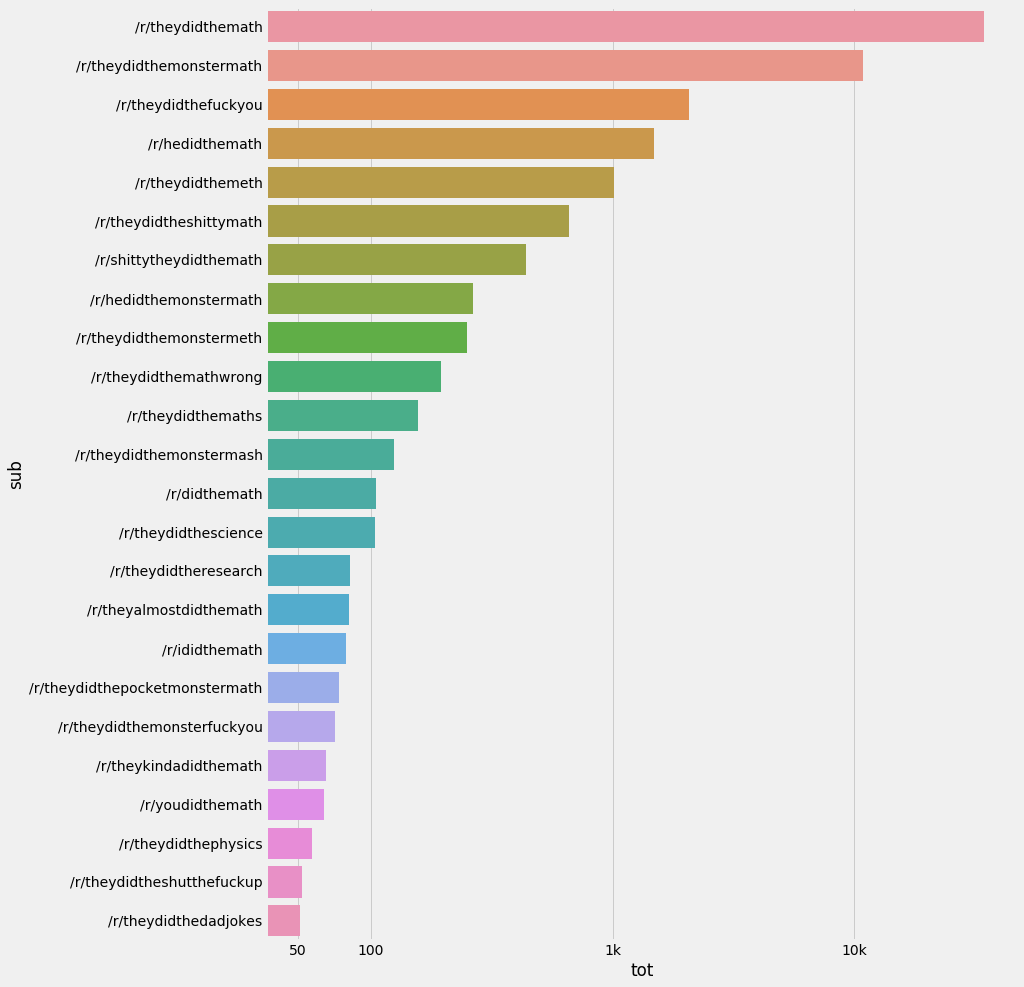

In [60]:
import seaborn as sns
n = 24
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(12, 16))
    sns.barplot(x='tot', y='sub', data=dt.head(n), ax=ax, orient='h')
    ax.set_xscale('log')
    ax.set_xticks([50, 100, 1000, 10000])
    ax.xaxis.set_major_formatter(k_formatter)